In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def generate_minibatches(dataset, batch_size=64):
    X, y = dataset
    l_idx, r_idx = 0, batch_size
    while r_idx < len(X):
        yield X[l_idx:r_idx], y[l_idx:r_idx]
        l_idx, r_idx = r_idx, r_idx + batch_size

    yield X[l_idx:], y[l_idx:]

def generate_k_fold_set(dataset, k = 10):
    X, y = dataset

    order = np.random.permutation(len(X))

    fold_width = len(X) // k

    l_idx, r_idx = 0, fold_width

    for i in range(k):
        train = np.concatenate([X[order[:l_idx]], X[order[r_idx:]]]), np.concatenate([y[order[:l_idx]], y[order[r_idx:]]])
        validation = X[order[l_idx:r_idx]], y[order[l_idx:r_idx]]
        yield train, validation
        l_idx, r_idx = r_idx, r_idx + fold_width

def shuffle(dataset):
    """
    Shuffle dataset.

    Make sure that corresponding images and labels are kept together.
    Ideas:
        NumPy array indexing
            https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing

    Parameters
    ----------
    dataset
        Tuple containing
            Images (X)
            Labels (y)

    Returns
    -------
        Tuple containing
            Images (X)
            Labels (y)
    """
    length = np.arange(dataset[1].size)
    np.random.shuffle(length)
    return (dataset[0][length],dataset[1][length])

In [4]:
def load_data(train = True):
    """
    Load the data from disk
    Parameters
    ----------
    train : bool
        Load training data if true, else load test data
    Returns
    -------
        Tuple:
            Images
            Labels
    """
    directory = 'train' if train else 'test'
    patterns = np.load(os.path.join('./data/', directory, 'images.npz'))['arr_0']
    labels = np.load(os.path.join('./data/', directory, 'labels.npz'))['arr_0']
    return patterns.reshape(len(patterns), -1), labels

In [5]:
def append_bias(X):
    """
    Append bias term for dataset.

    Parameters
    ----------
    X
        2d numpy array with shape (N,d)

    Returns
    -------
        2d numpy array with shape (N,d+1)
    """
    return np.concatenate((X,np.random.randint(np.max(X),size=X.shape[0]).reshape(X.shape[0],1)), axis=1)

In [6]:
patterns, labels = load_data(False)

In [7]:
patterns

array([[ 0, 97, 35, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [8]:
patterns.shape

(10000, 784)

In [15]:
zero = patterns[np.where(labels==0)][0]
one = patterns[np.where(labels==1)][0]
two = patterns[np.where(labels==2)][0]
three = patterns[np.where(labels==3)][0]
four = patterns[np.where(labels==4)][0]
five= patterns[np.where(labels==5)][0]
six= patterns[np.where(labels==6)][0]
seven= patterns[np.where(labels==7)][0]
eight= patterns[np.where(labels==8)][0]
nine= patterns[np.where(labels==9)][0]

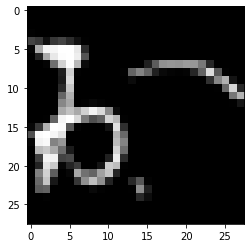

In [16]:
plt.imshow(zero.reshape(28, 28), cmap='gray')

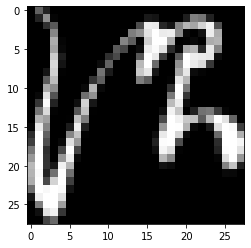

In [17]:
plt.imshow(patterns[0].reshape(28, 28), cmap='gray')

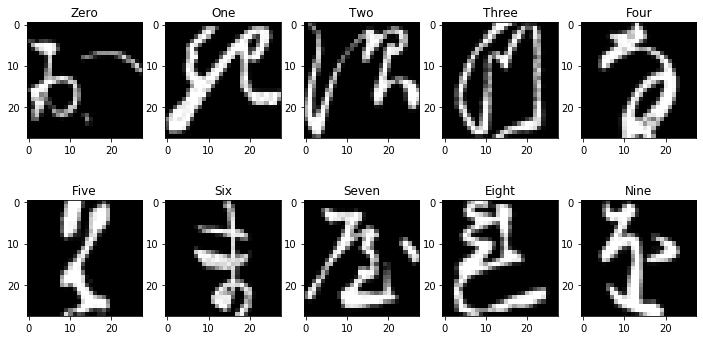

In [19]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 5,figsize=(12,6))

  
axis[0, 0].imshow(zero.reshape(28, 28), cmap='gray')
axis[0, 0].set_title("Zero")
  
axis[0, 1].imshow(one.reshape(28, 28), cmap='gray')
axis[0, 1].set_title("One")

axis[0, 2].imshow(two.reshape(28, 28), cmap='gray')
axis[0, 2].set_title("Two")

axis[0, 3].imshow(three.reshape(28, 28), cmap='gray')
axis[0, 3].set_title("Three")

axis[0, 4].imshow(four.reshape(28, 28), cmap='gray')
axis[0, 4].set_title("Four")

axis[1, 0].imshow(five.reshape(28, 28), cmap='gray')
axis[1, 0].set_title("Five")

axis[1, 1].imshow(six.reshape(28, 28), cmap='gray')
axis[1, 1].set_title("Six")

axis[1, 2].imshow(seven.reshape(28, 28), cmap='gray')
axis[1, 2].set_title("Seven")

axis[1, 3].imshow(eight.reshape(28, 28), cmap='gray')
axis[1, 3].set_title("Eight")

axis[1, 4].imshow(nine.reshape(28, 28), cmap='gray')
axis[1, 4].set_title("Nine")
  
# Combine all the operations and display
plt.show()

In [13]:
zero = patterns[np.where(labels==0)].shape
one = patterns[np.where(labels==1)].shape
two = patterns[np.where(labels==2)].shape
three = patterns[np.where(labels==3)].shape
four = patterns[np.where(labels==4)].shape
five= patterns[np.where(labels==5)].shape
six= patterns[np.where(labels==6)].shape
seven= patterns[np.where(labels==7)].shape
eight= patterns[np.where(labels==8)].shape
nine= patterns[np.where(labels==9)].shape

In [40]:
print(zero,one,two,three,four,five,six,seven,eight,nine)

(1000, 784) (1000, 784) (1000, 784) (1000, 784) (1000, 784) (1000, 784) (1000, 784) (1000, 784) (1000, 784) (1000, 784)


In [21]:
def z_score_normalize(X, u = None, xd = None):
    """
    Performs z-score normalization on X.

    f(x) = (x - μ) / σ
        where
            μ = mean of x
            σ = standard deviation of x

    Parameters
    ----------
    X : np.array
        The data to z-score normalize
    u (optional) : np.array
        The mean to use when normalizing
    sd (optional) : np.array
        The standard deviation to use when normalizing

    Returns
    -------
        Tuple:
            Transformed dataset with mean 0 and stdev 1
            Computed statistics (mean and stdev) for the dataset to undo z-scoring.
    """
    means = np.mean(X, axis=0)
    standard_deviation = np.std(X, axis=0)
    return (X-means)/standard_deviation

In [18]:
c = append_bias(patterns)
c.shape

(60000, 785)

In [19]:
ones = (c[np.where(labels==1)],labels[labels==1])
twos = (c[np.where(labels==2)],labels[labels==2])
sixths = (c[np.where(labels==6)],labels[labels==6])

In [22]:
onwtwo=z_score_normalize(np.concatenate([twos[0],sixths[0]]))

In [23]:
labels12 = np.array(labels[labels==2].size*[0]+labels[labels==6].size*[1])

In [24]:
#for ones and twos
onetwo = (onwtwo,labels12)

In [31]:
logistic_regression=Network(1,sigmoid, binary_cross_entropy,1)

In [33]:
def train_data(X):
    X,y = X
    
    training_losses = []
    validation_losses = []
    weight_lst = []
    training_losses = []
    validation_losses = []

    for training, validation in generate_k_fold_set((X,y)):
        
        networks = Network(0.01, z_score_normalize, binary_cross_entropy, 1)
        
        for epoch in range(100):
            shuffle(training)
            train_loss,train_accuracy = networks.train(training)
            print(train_loss)
            vali_loss,vali_accuracy = networks.test(validation)
    
    return training_losses

In [25]:
"""
NOTE
----
Start by implementing your methods in non-vectorized format - use loops and other basic programming constructs.
Once you're sure everything works, use NumPy's vector operations (dot products, etc.) to speed up your network.
"""

def sigmoid(a):
    """
    Compute the sigmoid function.

    f(x) = 1 / (1 + e ^ (-x))

    Parameters
    ----------
    a
        The internal value while a pattern goes through the network
    Returns
    -------
    float
       Value after applying sigmoid (z from the slides).
    """
    return 1/(1+np.exp(-a))

def softmax(a):
    """
    Compute the softmax function.

    f(x) = (e^x) / Σ (e^x)

    Parameters
    ----------
    a
        The internal value while a pattern goes through the network
    Returns
    -------
    float
       Value after applying softmax (z from the slides).
    """
    a_exp = np.exp(a)
    partition = np.sum(a_exp, axis=1)
    return a_exp / partition

def binary_cross_entropy(y, t):
    """
    Compute binary cross entropy.

    L(x) = t*ln(y) + (1-t)*ln(1-y)

    Parameters
    ----------
    y
        The network's predictions
    t
        The corresponding targets
    Returns
    -------
    float
        binary cross entropy loss value according to above definition
    """
    return t*np.log(y)+ (1-t)*np.log(1-y)

def multiclass_cross_entropy(y, t):
    """
    Compute multiclass cross entropy.

    L(x) = - Σ (t*ln(y))

    Parameters
    ----------
    y
        The network's predictions
    t
        The corresponding targets
    Returns
    -------
    float
        multiclass cross entropy loss value according to above definition
    """
    return np.sum(t*np.log(y),axis=1)

class Network:
    def __init__(self, hyperparameters, activation, loss, out_dim):
        """
        Perform required setup for the network.

        Initialize the weight matrix, set the activation function, save hyperparameters.

        You may want to create arrays to save the loss values during training.

        Parameters
        ----------
        hyperparameters
            A Namespace object from `argparse` containing the hyperparameters
        activation
            The non-linear activation function to use for the network
        loss
            The loss function to use while training and testing
        """
        self.hyperparameters = hyperparameters
        self.activation = activation
        self.loss = loss
        self.weights = np.zeros((28*28+1, out_dim))

    def forward(self, X):
        """
        Apply the model to the given patterns

        Use `self.weights` and `self.activation` to compute the network's output

        f(x) = σ(w*x)
            where
                σ = non-linear activation function(ReLu)
                w = weight matrix

        Make sure you are using matrix multiplication when you vectorize your code!

        Parameters
        ----------
        X
            Patterns to create outputs for
        """
        return self.activation(X@self.weights)

    def __call__(self, X):
        return self.forward(X)

    def train(self, minibatch):
        """
        Train the network on the given minibatch

        Use `self.weights` and `self.activation` to compute the network's output
        Use `self.loss` and the gradient defined in the slides to update the network.

        Parameters
        ----------
        minibatch
            The minibatch to iterate over

        Returns
        -------
        tuple containing:
            average loss over minibatch#
            accuracy over minibatch
        """
        X, y = minibatch
        
        for X_train,y_train in generate_minibatches(X):
            # apply activation function 64x1
            activated = self.forward(X_train)
            #errors 785x1
            errors = activated - y_train.reshape(y_train.shape[0],out_dim)
            #calculates gradient 1x785
            gradients = errors.T@X_train
            # update weights using stochastic gradient descent
            self.weights = self.weights - 0.001*(gradients.T)

        # calculate loss
        train_loss = self.loss(self.forward(X), y.reshape(-1,out_dim))
        train_accuracy = ((self.forward(X)>=0.5) ==y.reshape(-1,out_dim))
        
        return np.mean(training_losses),np.mean(train_accuracy)
    
    
    def test(self, minibatch):
        """
        Test the network on the given minibatch

        Use `self.weights` and `self.activation` to compute the network's output
        Use `self.loss` to compute the loss.
        Do NOT update the weights in this method!

        Parameters
        ----------
        minibatch
            The minibatch to iterate over

        Returns
        -------
            tuple containing:
                average loss over minibatch
                accuracy over minibatch
        """
        X, y = minibatch
        
         # calculate loss
        validation_losses = self.loss(self.forward(X), y.reshape(-1,out_dim))
        vali_accuracy = ((self.forward(X)>=0.5) == y.reshape(-1,out_dim))
        
        return validation_losses,vali_accuracy


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))
ax.plot(np.arange(1, 500+1), training_losses, '--o')
ax.set_title('Gradient descent with momentum beta 0.9 loss curve')
ax.set_xlabel('Iteration')
ax.set_ylabel('loss')